## Post Sentiment Classification Task

In [14]:
#Loading the dataset
import pandas as pd
import numpy as np

train_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_train.json")

validation_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_validation.json")

test_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_test.json")

In [15]:
# Your code here
print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(12138, 12)
(3109, 12)
(4016, 12)


In [7]:
train_data.head(5)


,subreddit,title,id,url,author,body,majority_type,is_first_post,post_depth,in_reply_to,sentiment.polarity,sentiment.subjectivity
0,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7f317,https://www.reddit.com/r/relationships/comment...,Melodrama_,"It's a sad realization, isn't it?",,False,2,t1_cy7erc5,negative,1.000000
1,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7hlyf,https://www.reddit.com/r/relationships/comment...,Melodrama_,I told her a couple of minutes ago that I didn...,elaboration,False,2,t1_cy7erc5,neutral,0.483631
2,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7etrr,https://www.reddit.com/r/relationships/comment...,TreatYoSelves,Leeches don't make good friends.,answer,False,1,t3_3xshx9,positive,0.600000
3,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7hhpq,https://www.reddit.com/r/relationships/comment...,Melodrama_,I just ended it. Apparently she wasn't a good ...,elaboration,False,2,t1_cy7etrr,positive,0.475000
4,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7q0qg,https://www.reddit.com/r/relationships/comment...,TreatYoSelves,Good for you! Make sure you stick with it.,appreciation,False,3,t1_cy7hhpq,positive,0.744444


In [16]:
#checking the count of training data and testing data
train_data_count=train_data['sentiment.polarity'].value_counts()
print(train_data_count)
train_data_count=test_data['sentiment.polarity'].value_counts()
train_data_count

neutral          7679
positive         3231
negative          878
very positive     253
very negative      97
Name: sentiment.polarity, dtype: int64


neutral          2514
positive         1102
negative          282
very positive      86
very negative      32
Name: sentiment.polarity, dtype: int64

In [17]:
train_data_count=train_data['sentiment.polarity'].value_counts()
for i,j in train_data_count.items():
  print(" {}  class consist of {} %  in training dataset  ".format(i,(j*100)/train_data.shape[0]))
print("-----------"*10)
validation_data_count=validation_data['sentiment.polarity'].value_counts()
for i,j in validation_data_count.items():
  print(" {}  class consist of {} %  in validation dataset  ".format(i,(j*100)/validation_data.shape[0]))
print("------"*10)
test_data_count=test_data['sentiment.polarity'].value_counts()
for i,j in test_data_count.items():
  print(" {}  class consist of {} %  in testing dataset  ".format(i,(j*100)/test_data.shape[0]))

 neutral  class consist of 63.2641291810842 %  in training dataset  
 positive  class consist of 26.61888284725655 %  in training dataset  
 negative  class consist of 7.233481627945296 %  in training dataset  
 very positive  class consist of 2.084363157027517 %  in training dataset  
 very negative  class consist of 0.7991431866864392 %  in training dataset  
--------------------------------------------------------------------------------------------------------------
 neutral  class consist of 63.07494371180444 %  in validation dataset  
 positive  class consist of 27.17915728530074 %  in validation dataset  
 negative  class consist of 6.9154068832422 %  in validation dataset  
 very positive  class consist of 2.348021871984561 %  in validation dataset  
 very negative  class consist of 0.48247024766806046 %  in validation dataset  
------------------------------------------------------------
 neutral  class consist of 62.5996015936255 %  in testing dataset  
 positive  class consi

In [152]:
train_data['sentiment.polarity'].value_counts().describe()

count       5.000000
mean     2427.600000
std      3193.136984
min        97.000000
25%       253.000000
50%       878.000000
75%      3231.000000
max      7679.000000
Name: sentiment.polarity, dtype: float64

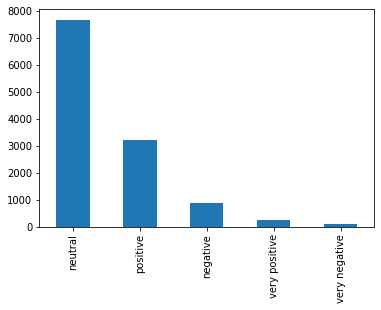

In [153]:
#distribution of labels in the training dataset
train_data['sentiment.polarity'].value_counts().plot.bar()

In [8]:
#defining the stopwords
import re


stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't","not"])

print(len(stopwords))

  

178


In [9]:
!python -m spacy download en

import spacy
import sys
print(sys.version)

# Version checks
import importlib
def version_check(libname, min_version):
    m = importlib.import_module(libname)
    print ("%s version %s is" % (libname, m.__version__))
    print ("OK" if m.__version__ >= min_version 
           else "out-of-date. Please upgrade!")
    
version_check("spacy", "2.0")

# Load the small english model. 
# Disable the advanced NLP features in the pipeline for efficiency.
nlp = spacy.load('en_core_web_sm', disable=['ner'])
print(nlp.pipeline)
print(nlp.pipe_names)
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')
# Verify they are empty.
print(nlp.pipeline)

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
spacy version 2.2.4 is
OK
[('tagger', <spacy.pipeline.pipes.Tagger object at 0x7efd371fa290>), ('parser', <spacy.pipeline.pipes.DependencyParser object at 0x7efd2f203ad0>)]
['tagger', 'parser']
[]


In [ ]:
train_data.shape

(12138, 12)

In [10]:
#preprocessing functions
import time
from nltk.stem.porter import PorterStemmer

def text_preprocessing(df,column):
  st=time.time()
  ps = PorterStemmer()
  mainstring=[]
  for str1 in df[column].values:
    str1 = decontracted(str1)
    str1 = re.sub('[^A-Za-z]+', ' ', str1)
    str1=str1.strip()
    str1 = ' '.join(e.lower() for e in str1.split() if e.lower() not in stopwords)
    doc = nlp(str1)
    str1=[]
    for token in doc:
            token=token.lemma_
            token=ps.stem(token)
            str1.append(token)
    str1 = ' '.join(str1)
    mainstring.append(str1.strip())
    et=time.time()
  print("time taken :  ",et-st)
  return mainstring

#mainstring=text_preprocessing(train_data,'body')

import time
from nltk.stem.porter import PorterStemmer

def text_preprocessing_new(df,column):
  st=time.time()
  ps = PorterStemmer()
  mainstring=[]
  for str1 in df[column].values:
    str1 = re.sub('[^A-Za-z]+', ' ', str1)
    str1=str1.strip()
    str1 = ' '.join(e.lower() for e in str1.split() if e.lower() not in stopwords)
    mainstring.append(str1.strip())
    et=time.time()
  print("time taken :  ",et-st)
  return mainstring






    




In [ ]:
import pickle
filename = 'train_preprocess_list'
outfile = open(filename,'wb')
pickle.dump(mainstring, outfile)

In [19]:
#bow
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer() #in scikit-learn

count_vect.fit(train_data['body'])
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

final_counts = count_vect.transform(train_data['body'])
#print(final_counts)
final_array=final_counts.toarray().copy()
print(final_array.shape)




some feature names  ['00', '000', '0000', '00005401', '00005402', '00005403', '00005404', '00005405', '00005406', '00005407']
(12138, 23832)


In [18]:
#changing labels to numeric
label=[]
for i in train_data['sentiment.polarity']:
  if i=='neutral':
    label.append(0)
  if i=="positive":
    label.append(1)
  if i=="negative":
    label.append(2)
  if i=="very positive":
    label.append(3)
  if i=="very negative":
    label.append(4)
  
print(len(label))




12138


In [21]:
#counting  labels
import collections
label_count = collections.Counter(label)
print(label_count)
print("----")
train_data['sentiment.polarity'].value_counts()


Counter({0: 7679, 1: 3231, 2: 878, 3: 253, 4: 97})
----


neutral          7679
positive         3231
negative          878
very positive     253
very negative      97
Name: sentiment.polarity, dtype: int64

In [22]:

test_label=[]
for i in test_data['sentiment.polarity']:
  if i=='neutral':
    test_label.append(0)
  if i=="positive":
    test_label.append(1)
  if i=="negative":
    test_label.append(2)
  if i=="very positive":
    test_label.append(3)
  if i=="very negative":
    test_label.append(4)
  
print(len(test_label))

label_count = collections.Counter(test_label)
print(label_count)

print("----")
test_features = count_vect.transform(test_data['body'])
print(test_features.shape,len(test_label))



4016
Counter({0: 2514, 1: 1102, 2: 282, 3: 86, 4: 32})
----
(4016, 23832) 4016


In [27]:
global t_name
global acc
global precision
global recall
global f1

global test_precision
global test_recall
global test_accuracy
global test_f1
#col_names=['Technique name','Train_Accuracy','Train_Precison','Train_Recall','Test_F1_score','Test_Accuracy','Test_Precison','Test_Recall','Test_F1_score']
col_names=['Technique name','Train_Accuracy','Test_Accuracy','Macro Train_Precison','Macro Test_Precison','Macro Train_Recall','Macro Test_Recall','Macro Train_F1_score','Macro Test_F1_score']
result_featureSelection=pd.DataFrame(columns=col_names)
result_featureSelection.head()

,Technique name,Train_Accuracy,Test_Accuracy,Macro Train_Precison,Macro Test_Precison,Macro Train_Recall,Macro Test_Recall,Macro Train_F1_score,Macro Test_F1_score


In [25]:
import math
def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score

def evaluation_summary(description, predictions, true_labels,train_prediction,true_train_labels):
  print("Evaluation for: " + description)

  global t_name
  global acc
  global precision
  global recall
  global f1

  global test_precision
  global test_recall
  global test_accuracy
  global test_f1

  precision = precision_score(train_prediction, true_train_labels,average='macro')
  precision = truncate(precision, 3)
  recall = recall_score(train_prediction, true_train_labels,average='macro')
  recall = truncate(recall, 3)
  acc = accuracy_score(train_prediction, true_train_labels)
  acc = truncate(acc, 3)
  f1 = f1_score(train_prediction, true_train_labels,average='macro')
  f1 = truncate(f1, 3)
  #print(precision)

  test_precision = precision_score(predictions, true_labels,average='macro')
  test_precision = truncate(test_precision, 3)
  test_recall = recall_score(predictions, true_labels,average='macro')
  test_recall = truncate(test_recall, 3)
  test_accuracy = accuracy_score(predictions, true_labels)
  test_accuracy = truncate(test_accuracy, 3)
  test_f1 = f1_score(predictions, true_labels,average='macro') 
  test_f1 = truncate(test_f1, 3)

  #print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f" % (description,accuracy,precision,recall,f1))
  #print(classification_report(predictions, true_labels, digits=3, zero_division = 0))


from sklearn.dummy import DummyClassifier
dummy_mf = DummyClassifier(strategy='most_frequent',random_state=0)
dummy_mf.fit(final_counts, label)
print(dummy_mf.score(test_features, test_label))
evaluation_summary("Dummy Classifier Most frequent strategy", dummy_mf.predict(test_features), test_label,dummy_mf.predict(final_counts),label)
#print(test_precision)
new_row = {'Technique name':'Dummy Classifier(Most frequent strategy)', 'Train_Accuracy':acc, 'Test_Accuracy':test_accuracy, 'Macro Train_Precison':precision,'Macro Test_Precison':test_precision,'Macro Train_Recall':recall,'Macro Test_Recall':test_recall,'Macro Train_F1_score':f1,'Macro Test_F1_score':test_f1
           }
result_featureSelection = result_featureSelection.append(new_row, ignore_index=True)


0.625996015936255
Evaluation for: Dummy Classifier Most frequent strategy


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
result_featureSelection.columns

Index(['Technique name', 'Train_Accuracy', 'Test_Accuracy',
       'Macro Train_Precison', ' Macro Test_Precison', 'Macro Train_Recall',
       'Macro Test_Recall', 'Macro Train_F1_score', 'Macro Test_F1_score',
       'Macro Test_Precison'],
      dtype='object')

In [165]:
result_featureSelection.head()

,Technique name,Train_Accuracy,Test_Accuracy,Macro Train_Precison,Macro Test_Precison,Macro Train_Recall,Macro Test_Recall,Macro Train_F1_score,Macro Test_F1_score
0,Dummy Classifier(Most frequent strategy),0.632,0.625,0.2,0.2,0.126,0.125,0.154,0.153


In [166]:
dummy_prior = DummyClassifier(strategy='stratified',random_state=0)
dummy_prior.fit(final_counts, label)
print(dummy_prior.score(test_features, test_label))
evaluation_summary("Dummy Stratified", dummy_prior.predict(test_features), test_label,dummy_prior.predict(final_counts),label)
new_row = {'Technique name':'Dummy Classifier(Stratified)', 'Train_Accuracy':acc, 'Test_Accuracy':test_accuracy, 'Macro Train_Precison':precision,
           
           'Macro Test_Precison':test_precision,'Macro Train_Recall':recall,'Macro Test_Recall':test_recall,'Macro Train_F1_score':f1,'Macro Test_F1_score':test_f1
           }
result_featureSelection = result_featureSelection.append(new_row, ignore_index=True)
result_featureSelection.head(5)

0.4810756972111554
Evaluation for: Dummy Stratified


,Technique name,Train_Accuracy,Test_Accuracy,Macro Train_Precison,Macro Test_Precison,Macro Train_Recall,Macro Test_Recall,Macro Train_F1_score,Macro Test_F1_score
0,Dummy Classifier(Most frequent strategy),0.632,0.625,0.200,0.200,0.126,0.125,0.154,0.153
1,Dummy Classifier(Stratified),0.483,0.481,0.199,0.219,0.199,0.223,0.199,0.221


In [167]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_model = lr.fit(final_counts, label)
print(lr_model.score(test_features, test_label))
evaluation_summary("LR onehot", lr_model.predict(test_features), test_label,lr_model.predict(final_counts),label)
new_row = {'Technique name':'Log Regression onehotencoding', 'Train_Accuracy':acc, 'Test_Accuracy':test_accuracy, 'Macro Train_Precison':precision,
           
           'Macro Test_Precison':test_precision,'Macro Train_Recall':recall,'Macro Test_Recall':test_recall,'Macro Train_F1_score':f1,'Macro Test_F1_score':test_f1
           }
result_featureSelection = result_featureSelection.append(new_row, ignore_index=True)

0.7397908366533864
Evaluation for: LR onehot


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [168]:
#tf_idf_logistic regression
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer()
tf_idf_vect.fit(train_data['body'])
train_features_tf_idf = tf_idf_vect.transform(train_data['body'])
print(train_features_tf_idf.shape,len(label))
test_features_tf_idf = tf_idf_vect.transform(test_data['body'])
print(test_features_tf_idf.shape,len(test_label))

(12138, 23832) 12138
(4016, 23832) 4016


In [169]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr_model = lr.fit(train_features_tf_idf, label)
print(lr_model.score(test_features_tf_idf, test_label))
evaluation_summary("LR tfidf", lr_model.predict(test_features_tf_idf), test_label,lr_model.predict(train_features_tf_idf),label)

new_row = {'Technique name':'Log Regression TF-IDF', 'Train_Accuracy':acc, 'Test_Accuracy':test_accuracy, 'Macro Train_Precison':precision,
           
           'Macro Test_Precison':test_precision,'Macro Train_Recall':recall,'Macro Test_Recall':test_recall,'Macro Train_F1_score':f1,'Macro Test_F1_score':test_f1
           }
result_featureSelection = result_featureSelection.append(new_row, ignore_index=True)

0.7387948207171314
Evaluation for: LR tfidf


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [170]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf',random_state=0)
svc = clf.fit(final_counts, label)
print(svc.score(test_features, test_label))
evaluation_summary("SVC ", svc.predict(test_features), test_label,svc.predict(final_counts),label)
new_row = {'Technique name':'Support vector machine(rbf)', 'Train_Accuracy':acc, 'Test_Accuracy':test_accuracy, 'Macro Train_Precison':precision,
           
           'Macro Test_Precison':test_precision,'Macro Train_Recall':recall,'Macro Test_Recall':test_recall,'Macro Train_F1_score':f1,'Macro Test_F1_score':test_f1
           }
result_featureSelection = result_featureSelection.append(new_row, ignore_index=True)
result_featureSelection.head()


0.703187250996016
Evaluation for: SVC 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Technique name,Train_Accuracy,Test_Accuracy,Macro Train_Precison,Macro Test_Precison,Macro Train_Recall,Macro Test_Recall,Macro Train_F1_score,Macro Test_F1_score
0,Dummy Classifier(Most frequent strategy),0.632,0.625,0.200,0.200,0.126,0.125,0.154,0.153
1,Dummy Classifier(Stratified),0.483,0.481,0.199,0.219,0.199,0.223,0.199,0.221
2,Log Regression onehotencoding,0.961,0.739,0.841,0.400,0.980,0.533,0.899,0.434
3,Log Regression TF-IDF,0.817,0.738,0.409,0.325,0.916,0.578,0.461,0.348
4,Support vector machine(rbf),0.778,0.703,0.319,0.265,0.528,0.292,0.324,0.259


In [29]:
from sklearn.naive_bayes import MultinomialNB  
from sklearn.feature_extraction.text import CountVectorizer

mainstring_train=text_preprocessing_new(train_data,'body')
mainstring_test=text_preprocessing_new(test_data,'body')


count_vect = CountVectorizer()

count_vect.fit(mainstring_train)
final_counts = count_vect.transform(mainstring_train)
final_array=final_counts.toarray().copy()
print(final_array.shape)
test_features=count_vect.transform(mainstring_test)

nb = MultinomialNB() 
nb = nb.fit(final_counts, label)
print(nb.score(test_features, test_label))
evaluation_summary("MultinomialNB ", nb.predict(test_features), test_label,nb.predict(final_counts),label)
new_row = {'Technique name':'MultinomialNB(One hot encoding)', 'Train_Accuracy':acc, 'Test_Accuracy':test_accuracy, 'Macro Train_Precison':precision,
           
           'Macro Test_Precison':test_precision,'Macro Train_Recall':recall,'Macro Test_Recall':test_recall,'Macro Train_F1_score':f1,'Macro Test_F1_score':test_f1
           }
result_featureSelection = result_featureSelection.append(new_row, ignore_index=True)

#result_featureSelection.head(6)

time taken :   0.30757737159729004
time taken :   0.09803104400634766
(12138, 21488)
0.6668326693227091
Evaluation for: MultinomialNB 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
result_featureSelection.columns

Index(['Technique name', 'Train_Accuracy', 'Test_Accuracy',
       'Macro Train_Precison', 'Macro Test_Precison', 'Macro Train_Recall',
       'Macro Test_Recall', 'Macro Train_F1_score', 'Macro Test_F1_score'],
      dtype='object')

In [172]:
def highlight_greaterthan(i, t, column):
  is_max = pd.Series(data=False, index=i.index)
  is_max = pd.Series(data=False, index=i.index)
  print()
  is_max[column] = i.loc[column] >= t
  return ['background-color: orange' if is_max.any() else '' for v in is_max]
 
result_featureSelection.style.apply(highlight_greaterthan, t=0.89, column=['Train_Accuracy'],axis=1)

,Technique name,Train_Accuracy,Test_Accuracy,Macro Train_Precison,Macro Test_Precison,Macro Train_Recall,Macro Test_Recall,Macro Train_F1_score,Macro Test_F1_score
0,Dummy Classifier(Most frequent strategy),0.632000,0.625000,0.200000,0.200000,0.126000,0.125000,0.154000,0.153000
1,Dummy Classifier(Stratified),0.483000,0.481000,0.199000,0.219000,0.199000,0.223000,0.199000,0.221000
2,Log Regression onehotencoding,0.961000,0.739000,0.841000,0.400000,0.980000,0.533000,0.899000,0.434000
3,Log Regression TF-IDF,0.817000,0.738000,0.409000,0.325000,0.916000,0.578000,0.461000,0.348000
4,Support vector machine(rbf),0.778000,0.703000,0.319000,0.265000,0.528000,0.292000,0.324000,0.259000
5,MultinomialNB(One hot encoding),0.822000,0.666000,0.423000,0.272000,0.763000,0.446000,0.458000,0.274000


In [94]:
def color_negative_red(val):
  color = 'red' if val == 'Log Regression TF-IDF'  or val==	0.817186 or val== 0.738795 else 'black'
  return 'color: %s' % color


abc=result_featureSelection.style.applymap(color_negative_red)
abc

,Technique name,Train_Accuracy,Test_Accuracy,Macro Train_Precison,Macro Test_Precison,Macro Train_Recall,Macro Test_Recall,Macro Train_F1_score,Macro Test_F1_score
0,Dummy Classifier(Most frequent strategy),0.632641,0.625996,0.200000,0.200000,0.126528,0.125199,0.154998,0.153997
1,Dummy Classifier(Stratified),0.483193,0.481076,0.199302,0.219628,0.199073,0.223825,0.199171,0.221427
2,Log Regression onehotencoding,0.961938,0.739791,0.841342,0.400866,0.980485,0.533362,0.899231,0.434517
3,Log Regression TF-IDF,0.817186,0.738795,0.409252,0.325113,0.916470,0.578372,0.461099,0.348645
4,Support vector machine(rbf),0.778464,0.703187,0.319618,0.265028,0.528774,0.292749,0.324828,0.259456
5,MultinomialNB(One hot encoding),0.822376,0.666833,0.423612,0.272203,0.763076,0.446755,0.458811,0.274583


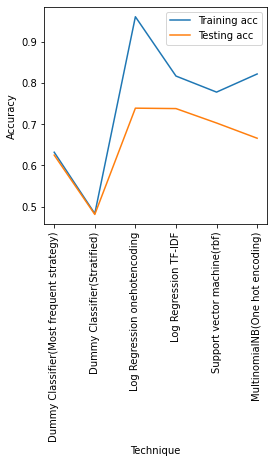

In [173]:
import matplotlib.pyplot as plt
import  numpy as np
%matplotlib inline

plt.figure(figsize=(4,4))
plt.xlabel("Technique")
plt.ylabel("Accuracy")
plt.plot(result_featureSelection['Technique name'],result_featureSelection['Train_Accuracy'],label="Training acc")
plt.plot(result_featureSelection['Technique name'],result_featureSelection['Test_Accuracy'],label="Testing acc")
plt.xticks(np.arange(6),result_featureSelection['Technique name'],rotation='vertical')
plt.legend()
plt.show()

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(random_state=0,max_iter=1000)
lr_model = lr.fit(final_counts, label)
print(lr_model.score(test_features, test_label))
#f1_report=classification_report(test_label, lr_model.predict(test_features_tf_idf), digits=3, output_dict=True)
f1_list=f1_score(test_label, lr_model.predict(test_features), average=None)
print(f1_list)

0.7238545816733067
[0.80762822 0.63121951 0.27272727 0.34108527 0.        ]


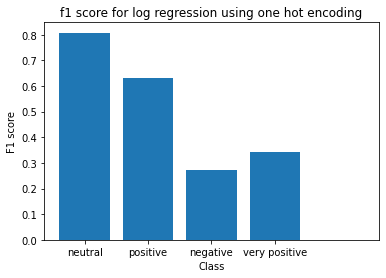

In [177]:

plt.title("f1 score for log regression using one hot encoding")
plt.bar(np.arange(5),f1_list)
plt.xlabel("Class")
plt.ylabel("F1 score")
plt.xticks(np.arange(4),['neutral','positive','negative','very positive','very negative'])
plt.show()

In [32]:
#hyperparameter tuning  
#1 max_features

label=[]
for i in train_data['sentiment.polarity']:
  if i=='neutral':
    label.append(0)
  if i=="positive":
    label.append(1)
  if i=="negative":
    label.append(2)
  if i=="very positive":
    label.append(3)
  if i=="very negative":
    label.append(4)
  
print("Train label",len(label))
#validation_mainstring=validation_data['body'].copy()

validation_mainstring=text_preprocessing_new(validation_data,'body')

validation_label=[]
for i in validation_data['sentiment.polarity']:
  if i=='neutral':
    validation_label.append(0)
  if i=="positive":
    validation_label.append(1)
  if i=="negative":
    validation_label.append(2)
  if i=="very positive":
    validation_label.append(3)
  if i=="very negative":
    validation_label.append(4)
  
print("Validation label",len(validation_label))


test_mainstring=text_preprocessing_new(test_data,'body')
test_label=[]
for i in test_data['sentiment.polarity']:
  if i=='neutral':
    test_label.append(0)
  if i=="positive":
    test_label.append(1)
  if i=="negative":
    test_label.append(2)
  if i=="very positive":
    test_label.append(3)
  if i=="very negative":
    test_label.append(4)
  
print(len(test_label))




Train label 12138
time taken :   0.07759976387023926
Validation label 3109
time taken :   0.09742331504821777
4016


In [ ]:
import pickle
filename = 'test_mainstring'
outfile = open(filename,'wb')
pickle.dump(test_mainstring, outfile)

filename = 'validation_mainstring'
outfile = open(filename,'wb')
pickle.dump(validation_mainstring, outfile)


In [33]:
import numpy as np
max_features_list=np.arange(500,50000,7000)
max_features_list=max_features_list[:]
print(max_features_list)

mainstring=mainstring_train.copy()

[  500  7500 14500 21500 28500 35500 42500 49500]


Train feature shape and label shape (12138, 500) 12138
Valid feature shape and label shape (3109, 500) 3109
Test feature shape and label shape (4016, 500) 4016
----------------------------------------------------------------------
Train feature shape and label shape (12138, 7500) 12138
Valid feature shape and label shape (3109, 7500) 3109
Test feature shape and label shape (4016, 7500) 4016
----------------------------------------------------------------------
Train feature shape and label shape (12138, 14500) 12138
Valid feature shape and label shape (3109, 14500) 3109
Test feature shape and label shape (4016, 14500) 4016
----------------------------------------------------------------------
Train feature shape and label shape (12138, 21488) 12138
Valid feature shape and label shape (3109, 21488) 3109
Test feature shape and label shape (4016, 21488) 4016
----------------------------------------------------------------------
Train feature shape and label shape (12138, 21488) 12138
Vali

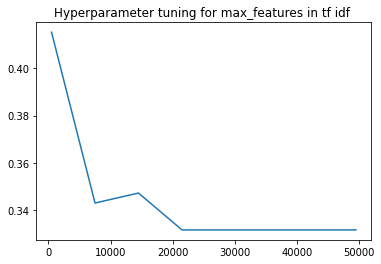

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
acc_list=[]
test_list_acc=[]
for i in max_features_list:
  tf_idf_vect = TfidfVectorizer(max_features=i)
  tf_idf_vect.fit(mainstring)
  train_features_tf_idf = tf_idf_vect.transform(mainstring)
  print("Train feature shape and label shape",train_features_tf_idf.shape,len(label))
  valid_features_tf_idf = tf_idf_vect.transform(validation_mainstring)
  print("Valid feature shape and label shape",valid_features_tf_idf.shape,len(validation_label))
  test_features_tf_idf = tf_idf_vect.transform(test_mainstring)
  print("Test feature shape and label shape",test_features_tf_idf.shape,len(test_label))
  print("-------"*10)



  lr = LogisticRegression(random_state=0,max_iter=1000)
  lr_model = lr.fit(train_features_tf_idf, label)
  acc_list.append(f1_score(validation_label, lr_model.predict(valid_features_tf_idf), average='macro'))
  test_list_acc.append(f1_score(test_label, lr_model.predict(test_features_tf_idf), average='macro'))

print(acc_list)
print(test_list_acc)

plt.title("Hyperparameter tuning for max_features in tf idf ")
plt.plot(max_features_list,acc_list)
plt.show()



** We choose hyperparameter max_feature as 1000, now we will tune sublinear_tf.

Train feature shape and label shape (12138, 1000) 12138
Valid feature shape and label shape (3109, 1000) 3109
Test feature shape and label shape (4016, 1000) 4016
----------------------------------------------------------------------
Train feature shape and label shape (12138, 8000) 12138
Valid feature shape and label shape (3109, 8000) 3109
Test feature shape and label shape (4016, 8000) 4016
----------------------------------------------------------------------
Train feature shape and label shape (12138, 15000) 12138
Valid feature shape and label shape (3109, 15000) 3109
Test feature shape and label shape (4016, 15000) 4016
----------------------------------------------------------------------
Train feature shape and label shape (12138, 21488) 12138
Valid feature shape and label shape (3109, 21488) 3109
Test feature shape and label shape (4016, 21488) 4016
----------------------------------------------------------------------
Train feature shape and label shape (12138, 21488) 12138
V

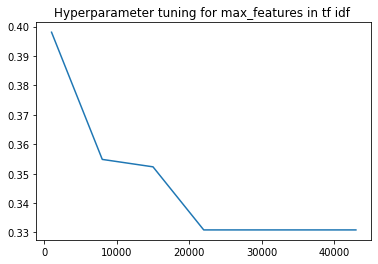

In [182]:
acc_list=[]
test_list_acc=[]
for i in max_features_list:
  tf_idf_vect = TfidfVectorizer(max_features=i,sublinear_tf='bool')
  tf_idf_vect.fit(mainstring)
  train_features_tf_idf = tf_idf_vect.transform(mainstring)
  print("Train feature shape and label shape",train_features_tf_idf.shape,len(label))
  valid_features_tf_idf = tf_idf_vect.transform(validation_mainstring)
  print("Valid feature shape and label shape",valid_features_tf_idf.shape,len(validation_label))
  test_features_tf_idf = tf_idf_vect.transform(test_mainstring)
  print("Test feature shape and label shape",test_features_tf_idf.shape,len(test_label))
  print("-------"*10)

  lr = LogisticRegression(random_state=0,max_iter=1000)
  lr_model = lr.fit(train_features_tf_idf, label)
  acc_list.append(f1_score(validation_label, lr_model.predict(valid_features_tf_idf), average='macro'))
  test_list_acc.append(f1_score(test_label, lr_model.predict(test_features_tf_idf), average='macro'))
  
print(acc_list)
print(test_list_acc)

plt.title("Hyperparameter tuning for max_features in tf idf ")
plt.plot(max_features_list,acc_list)
plt.show()


In [38]:
c=[10**i for i in range(-3,4)]
print(c)

[0.001, 0.01, 0.1, 1, 10, 100, 1000]


Train feature shape and label shape (12138, 700) 12138
Valid feature shape and label shape (3109, 700) 3109
Test feature shape and label shape (4016, 700) 4016
----------------------------------------------------------------------
[0.1547140039447732, 0.16355012208803535, 0.23912254408327277, 0.3963526514138037, 0.47145734120320143, 0.48685746219968473, 0.4764940653352988]
[0.15399693721286373, 0.16310696774783168, 0.247634047382104, 0.4011098610662792, 0.4981940451299458, 0.485940876379646, 0.46862444210192794]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


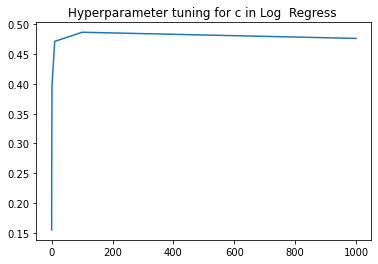

In [39]:
#tuning c
acc_list=[]
test_list_acc=[]
tf_idf_vect = TfidfVectorizer(max_features=700,sublinear_tf='bool')
tf_idf_vect.fit(mainstring)
train_features_tf_idf = tf_idf_vect.transform(mainstring)
print("Train feature shape and label shape",train_features_tf_idf.shape,len(label))
valid_features_tf_idf = tf_idf_vect.transform(validation_mainstring)
print("Valid feature shape and label shape",valid_features_tf_idf.shape,len(validation_label))
test_features_tf_idf = tf_idf_vect.transform(test_mainstring)
print("Test feature shape and label shape",test_features_tf_idf.shape,len(test_label))
print("-------"*10)
for i in c:
  lr = LogisticRegression(random_state=0,max_iter=1000,C=i)
  lr_model = lr.fit(train_features_tf_idf, label)
  acc_list.append(f1_score(validation_label, lr_model.predict(valid_features_tf_idf), average='macro'))
  test_list_acc.append(f1_score(test_label, lr_model.predict(test_features_tf_idf), average='macro'))
  
print(acc_list)
print(test_list_acc)

plt.title("Hyperparameter tuning for c in Log  Regress ")
plt.plot(c,acc_list)
plt.show()

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Pass in the tokenizer as the tokenizer to the vectorizer.
# Create a one-hot encoding vectorizer.
one_hot_vectorizer = TfidfVectorizer(max_features=700,sublinear_tf='bool')
train_features = one_hot_vectorizer.fit_transform(mainstring)
test=text_preprocessing_new(test_data,'body')
test_features = one_hot_vectorizer.transform(test)
lr = LogisticRegression(random_state=1,max_iter=1000,C=15,solver='sag')
lr_model = lr.fit(train_features, label)
print("Test accuracy after hyper parameter tuning",lr_model.score(test_features, test_label))
print("Train accuracy after hyper parameter tuning",lr_model.score(train_features, label))

f1_score(test_label, lr_model.predict(test_features), average='macro')



time taken :   0.09989666938781738
Test accuracy after hyper parameter tuning 0.7432768924302788
Train accuracy after hyper parameter tuning 0.7915636842972483


0.504985483802782

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Pass in the tokenizer as the tokenizer to the vectorizer.
# Create a one-hot encoding vectorizer.
one_hot_vectorizer = TfidfVectorizer(max_features=700,sublinear_tf='bool')
train_features = one_hot_vectorizer.fit_transform(mainstring)
test=text_preprocessing_new(test_data,'body')
test_features = one_hot_vectorizer.transform(test)
lr = LogisticRegression(random_state=1,max_iter=1000,C=15)
lr_model = lr.fit(train_features, label)
print("Test accuracy after hyper parameter tuning",lr_model.score(test_features, test_label))
print("Train accuracy after hyper parameter tuning",lr_model.score(train_features, label))

f1_score(test_label, lr_model.predict(test_features), average='macro')


time taken :   0.09557342529296875
Test accuracy after hyper parameter tuning 0.7432768924302788
Train accuracy after hyper parameter tuning 0.791646070192783


0.504985483802782

In [50]:
from mlxtend.plotting import plot_confusion_matrix


Confusion matrix


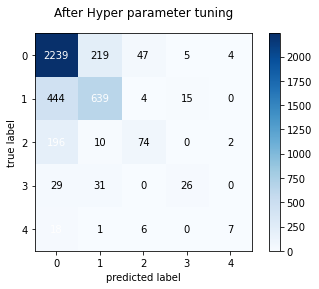

              precision    recall  f1-score   support

           0      0.765     0.891     0.823      2514
           1      0.710     0.580     0.638      1102
           2      0.565     0.262     0.358       282
           3      0.565     0.302     0.394        86
           4      0.538     0.219     0.311        32

    accuracy                          0.743      4016
   macro avg      0.629     0.451     0.505      4016
weighted avg      0.730     0.743     0.727      4016



In [60]:


confusion = confusion_matrix(test_label, lr_model.predict(test_features))
print("Confusion matrix")
#print(confusion)

plot_confusion_matrix(conf_mat=confusion,
                                colorbar=True)
plt.title("After Hyper parameter tuning")
plt.show()
print(classification_report(test_label, lr_model.predict(test_features), digits=3))

In [64]:
label_count = collections.Counter(test_label)
print(label_count)

Counter({0: 2514, 1: 1102, 2: 282, 3: 86, 4: 32})


In [66]:
collections.Counter(lr_model.predict(test_features))

Counter({0: 2926, 1: 900, 2: 131, 3: 46, 4: 13})

(12138, 23832) 12138
(4016, 23832) 4016


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7387948207171314
Confusion matrix


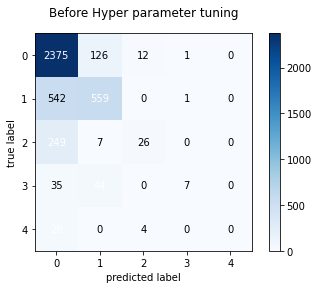

              precision    recall  f1-score   support

           0      0.736     0.945     0.827      2514
           1      0.760     0.507     0.608      1102
           2      0.619     0.092     0.160       282
           3      0.778     0.081     0.147        86
           4      0.000     0.000     0.000        32

    accuracy                          0.739      4016
   macro avg      0.578     0.325     0.349      4016
weighted avg      0.729     0.739     0.699      4016



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer()
tf_idf_vect.fit(train_data['body'])
train_features_tf_idf = tf_idf_vect.transform(train_data['body'])
print(train_features_tf_idf.shape,len(label))
test_features_tf_idf = tf_idf_vect.transform(test_data['body'])
print(test_features_tf_idf.shape,len(test_label))

lr = LogisticRegression(random_state=0)
lr_model = lr.fit(train_features_tf_idf, label)
print(lr_model.score(test_features_tf_idf, test_label))

confusion = confusion_matrix(test_label, lr_model.predict(test_features_tf_idf))
print("Confusion matrix")
#print(confusion)

plot_confusion_matrix(conf_mat=confusion,
                                colorbar=True)
plt.title("Before Hyper parameter tuning")
plt.show()
print(classification_report(test_label, lr_model.predict(test_features_tf_idf), digits=3))

In [196]:
print(classification_report(label, lr_model.predict(train_features), digits=3))

              precision    recall  f1-score   support

           0      0.793     0.928     0.855      7679
           1      0.777     0.621     0.690      3231
           2      0.823     0.382     0.521       878
           3      0.881     0.470     0.613       253
           4      0.929     0.268     0.416        97

    accuracy                          0.792     12138
   macro avg      0.841     0.534     0.619     12138
weighted avg      0.794     0.792     0.778     12138



In [ ]:
print("Mean of negative  sentiment subjectivity : ",train_data[train_data['sentiment.polarity']=='negative']['sentiment.subjectivity'].describe())
#print("Median of negative  sentiment subjectivity : ",train_data[train_data['sentiment.polarity']=='negative']['sentiment.subjectivity'].describe()['50%'])
print("---")
print("Mean of neutral  sentiment subjectivity",train_data[train_data['sentiment.polarity']=='neutral']['sentiment.subjectivity'].describe())
print("Median of neutral  sentiment subjectivity",train_data[train_data['sentiment.polarity']=='neutral']['sentiment.subjectivity'].describe()['50%'])
print("----")
print("Mean of positive  sentiment subjectivity",train_data[train_data['sentiment.polarity']=='positive']['sentiment.subjectivity'].describe()['mean'])
print("Median of positive  sentiment subjectivity",train_data[train_data['sentiment.polarity']=='positive']['sentiment.subjectivity'].describe()['50%'])
print("---")
print("Mean of very positive  sentiment subjectivity",train_data[train_data['sentiment.polarity']=='very positive']['sentiment.subjectivity'].describe()['mean'])
print("Median of very positive  sentiment subjectivity",train_data[train_data['sentiment.polarity']=='very positive']['sentiment.subjectivity'].describe()['50%'])
print("---")
print("Mean of very negative  sentiment subjectivity: ",train_data[train_data['sentiment.polarity']=='very negative']['sentiment.subjectivity'].describe()['mean'])
print("Median of very negative  sentiment subjectivity :",train_data[train_data['sentiment.polarity']=='very negative']['sentiment.subjectivity'].describe()['50%'])
print("---")

Mean of negative  sentiment subjectivity :  count    878.000000
mean       0.616039
std        0.232289
min        0.000000
25%        0.450000
50%        0.618783
75%        0.766667
max        1.000000
Name: sentiment.subjectivity, dtype: float64
---
Mean of neutral  sentiment subjectivity count    7679.000000
mean        0.264642
std         0.274865
min         0.000000
25%         0.000000
50%         0.250000
75%         0.483333
max         1.000000
Name: sentiment.subjectivity, dtype: float64
Median of neutral  sentiment subjectivity 0.25
----
Mean of positive  sentiment subjectivity 0.5508306735436095
Median of positive  sentiment subjectivity 0.5357142857
---
Mean of very positive  sentiment subjectivity 0.7665579710142295
Median of very positive  sentiment subjectivity 0.78
---
Mean of very negative  sentiment subjectivity:  0.942071674029897
Median of very negative  sentiment subjectivity : 1.0
---


In [ ]:
print("Mean of negative  sentiment subjectivity : ",train_data[train_data['sentiment.polarity']=='negative']['sentiment.subjectivity'].describe()['mean'])
print("Median of negative  sentiment subjectivity : ",train_data[train_data['sentiment.polarity']=='negative']['sentiment.subjectivity'].describe()['50%'])
print("---")
print("Mean of neutral  sentiment subjectivity",train_data[train_data['sentiment.polarity']=='neutral']['sentiment.subjectivity'].describe()['mean'])
print("Median of neutral  sentiment subjectivity",train_data[train_data['sentiment.polarity']=='neutral']['sentiment.subjectivity'].describe()['50%'])
print("----")
print("Mean of positive  sentiment subjectivity",train_data[train_data['sentiment.polarity']=='positive']['sentiment.subjectivity'].describe()['mean'])
print("Median of positive  sentiment subjectivity",train_data[train_data['sentiment.polarity']=='positive']['sentiment.subjectivity'].describe()['50%'])
print("---")
print("Mean of very positive  sentiment subjectivity",train_data[train_data['sentiment.polarity']=='very positive']['sentiment.subjectivity'].describe()['mean'])
print("Median of very positive  sentiment subjectivity",train_data[train_data['sentiment.polarity']=='very positive']['sentiment.subjectivity'].describe()['50%'])
print("---")
print("Mean of very negative  sentiment subjectivity: ",train_data[train_data['sentiment.polarity']=='very negative']['sentiment.subjectivity'].describe()['mean'])
print("Median of very negative  sentiment subjectivity :",train_data[train_data['sentiment.polarity']=='very negative']['sentiment.subjectivity'].describe()['50%'])
print("---")

Mean of negative  sentiment subjectivity :  0.6160388444440766
Median of negative  sentiment subjectivity :  0.61878306875
---
Mean of neutral  sentiment subjectivity 0.26464225826580295
Median of neutral  sentiment subjectivity 0.25
----
Mean of positive  sentiment subjectivity 0.5508306735436095
Median of positive  sentiment subjectivity 0.5357142857
---
Mean of very positive  sentiment subjectivity 0.7665579710142295
Median of very positive  sentiment subjectivity 0.78
---
Mean of very negative  sentiment subjectivity:  0.942071674029897
Median of very negative  sentiment subjectivity : 1.0
---


In [ ]:
mean_negative=train_data[train_data['sentiment.polarity']=='negative']['sentiment.subjectivity'].describe()['mean']
mean_negative = round(mean_negative, 2)
median_negative=train_data[train_data['sentiment.polarity']=='negative']['sentiment.subjectivity'].describe()['50%']
median_negative = round(median_negative, 2)
#print("---")
mean_neutral=train_data[train_data['sentiment.polarity']=='neutral']['sentiment.subjectivity'].describe()['mean']
mean_neutral = round(mean_neutral, 2)
median_neutral=train_data[train_data['sentiment.polarity']=='neutral']['sentiment.subjectivity'].describe()['50%']
median_neutral = round(median_neutral, 2)
#print("----")
mean_pos=train_data[train_data['sentiment.polarity']=='positive']['sentiment.subjectivity'].describe()['mean']
mean_pos = round(mean_pos, 2)
median_pos=train_data[train_data['sentiment.polarity']=='positive']['sentiment.subjectivity'].describe()['50%']
median_pos = round(median_pos, 2)
#print("---")
mean_vp=train_data[train_data['sentiment.polarity']=='very positive']['sentiment.subjectivity'].describe()['mean']
mean_vp = round(mean_vp, 2)
median_vp=train_data[train_data['sentiment.polarity']=='very positive']['sentiment.subjectivity'].describe()['50%']
median_vp = round(median_vp, 2)
#print("---")
mean_vn=train_data[train_data['sentiment.polarity']=='very negative']['sentiment.subjectivity'].describe()['mean']
mean_vn = round(mean_vn, 2)
median_vn=train_data[train_data['sentiment.polarity']=='very negative']['sentiment.subjectivity'].describe()['50%']
median_vn = round(median_vn, 2)
#print("---")


In [ ]:
mean_list=[]
for i in train_data['sentiment.polarity']:
  if i=='neutral':
    mean_list.append(mean_negative)
  if i=="positive":
    mean_list.append(mean_neutral)
  if i=="negative":
    mean_list.append(mean_pos)
  if i=="very positive":
    mean_list.append(mean_vp)
  if i=="very negative":
    mean_list.append(mean_vn)


  


In [ ]:
import time
from nltk.stem.porter import PorterStemmer

def text_preprocessing_new(df,column):
  st=time.time()
  ps = PorterStemmer()
  mainstring=[]
  for str1 in df[column].values:
    str1 = re.sub('[^A-Za-z]+', ' ', str1)
    str1=str1.strip()
    str1 = ' '.join(e.lower() for e in str1.split() if e.lower() not in stopwords)
    mainstring.append(str1.strip())
    et=time.time()
  print("time taken :  ",et-st)
  return mainstring

mainstring_new=text_preprocessing_new(train_data,'body')


time taken :   0.29080963134765625


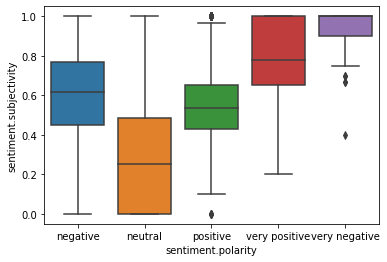

In [80]:
import seaborn as sns
ax = sns.boxplot(y="sentiment.subjectivity",x="sentiment.polarity", data=train_data)
plt.show()

In [82]:
col_names=['Standard Dev', 'Mean']
pol_df=pd.DataFrame(columns=col_names)
pol_df.head()

,Standard Dev,Mean


In [ ]:
df_train[df_train['sentiment.polarity']=='negative']['len'].describe()['std']
df_train[df_train['sentiment.polarity']=='negative']['len'].describe()['50%']

count     878.000000
mean      139.195900
std       158.423643
min         4.000000
25%        56.000000
50%       103.000000
75%       169.750000
max      3201.000000
Name: len, dtype: float64

In [91]:
x2=[]
x=df_train[df_train['sentiment.polarity']=='neutral']['len'].describe()['std']
x1=df_train[df_train['sentiment.polarity']=='neutral']['len'].describe()['50%']
x2.append([x,x1])
x=df_train[df_train['sentiment.polarity']=='positive']['len'].describe()['std']
x1=df_train[df_train['sentiment.polarity']=='positive']['len'].describe()['50%']
x2.append([x,x1])
x=df_train[df_train['sentiment.polarity']=='negative']['len'].describe()['std']
x1=df_train[df_train['sentiment.polarity']=='negative']['len'].describe()['50%']
x2.append([x,x1])
x=df_train[df_train['sentiment.polarity']=='very positive']['len'].describe()['std']
x1=df_train[df_train['sentiment.polarity']=='very positive']['len'].describe()['50%']
x2.append([x,x1])
x=df_train[df_train['sentiment.polarity']=='very negative']['len'].describe()['std']
x1=df_train[df_train['sentiment.polarity']==' very negative']['len'].describe()['50%']
x2.append([x,x1])

col_names=['Standard Dev', 'Median']
pol_df=pd.DataFrame( x2,columns=col_names,index=['neutral','positive','negative','very positive','very negative'])
pol_df.head()


,Standard Dev,Median
neutral,434.306666,93.0
positive,260.196989,127.0
negative,158.423643,103.0
very positive,57.350506,52.0
very negative,62.943519,NaN


In [87]:
df_train[df_train['sentiment.polarity']==' very negative']['len'].describe()['mean']

nan

In [ ]:
df_train[df_train['sentiment.polarity']=='positive']['len'].describe()

count    3231.000000
mean      199.851749
std       260.196989
min         3.000000
25%        67.000000
50%       127.000000
75%       243.000000
max      6177.000000
Name: len, dtype: float64

In [92]:
df_train=train_data[['body','sentiment.polarity','sentiment.subjectivity',]].copy()
print(type(df_train))
df_train['len']=df_train['body'].astype(str).apply(lambda x : len(x))
df_train['len']=df_train['len']/np.max(df_train['len'])
df_train.head(5)


<class 'pandas.core.frame.DataFrame'>


,body,sentiment.polarity,sentiment.subjectivity,len
0,"It's a sad realization, isn't it?",negative,1.000000,0.002809
1,I told her a couple of minutes ago that I didn...,neutral,0.483631,0.038563
2,Leeches don't make good friends.,positive,0.600000,0.002809
3,I just ended it. Apparently she wasn't a good ...,positive,0.475000,0.011067
4,Good for you! Make sure you stick with it.,positive,0.744444,0.003746


In [93]:
from scipy import sparse
label=[]
for i in train_data['sentiment.polarity']:
  if i=='neutral':
    label.append(0)
  if i=="positive":
    label.append(1)
  if i=="negative":
    label.append(2)
  if i=="very positive":
    label.append(3)
  if i=="very negative":
    label.append(4)
  
print("Train label",len(label))

mainstring_new=text_preprocessing_new(train_data,'body')
print(len(mainstring_new))
one_hot_vectorizer = TfidfVectorizer(max_features=700,sublinear_tf='bool',min_df=4)
train_features = one_hot_vectorizer.fit_transform(mainstring_new)
print(train_features.shape)

train=df_train.iloc[:,2:].values
print(train.shape)

train_features=sparse.hstack((train_features,train)).A
train_features.shape


Train label 12138
time taken :   0.2927868366241455
12138
(12138, 700)
(12138, 2)


(12138, 702)

In [95]:
df_test=test_data[['body','sentiment.polarity','sentiment.subjectivity']].copy()
print(type(df_test))
df_test['len']=df_test['body'].astype(str).apply(lambda x : len(x))
df_test['len']=df_test['len']/np.max(df_test['len'])
df_test.head(5)

<class 'pandas.core.frame.DataFrame'>


,body,sentiment.polarity,sentiment.subjectivity,len
0,Was watching a VOD from last years DreamHack W...,neutral,0.350000,0.050487
1,I find it cool that both Mana and Naama made i...,positive,0.650000,0.025243
2,"Even better, watch a VOD from [MLG Raleigh](ht...",neutral,0.800000,0.052872
3,Wasn't that also an epic and awesome series? I...,very positive,0.566667,0.022461
4,Basically what the title says.,neutral,0.000000,0.005963


In [96]:
from scipy import sparse
test_label=[]
for i in test_data['sentiment.polarity']:
  if i=='neutral':
    test_label.append(0)
  if i=="positive":
    test_label.append(1)
  if i=="negative":
    test_label.append(2)
  if i=="very positive":
    test_label.append(3)
  if i=="very negative":
    test_label.append(4)
  
print("Test label",len(test_label))

test_mainstring_new=text_preprocessing_new(test_data,'body')
print(len(test_mainstring_new))
test_features = one_hot_vectorizer.transform(test_mainstring_new)
print(test_features.shape)

test=df_test.iloc[:,2:].values
print(test.shape,)

test_features=sparse.hstack((test_features,test)).A
test_features.shape

Test label 4016
time taken :   0.10477066040039062
4016
(4016, 700)
(4016, 2)


(4016, 702)

In [98]:
df_validate=validation_data[['body','sentiment.polarity','sentiment.subjectivity']].copy()
print(type(df_validate))
df_validate['len']=df_validate['body'].astype(str).apply(lambda x : len(x))
df_validate['len']=df_validate['len']/np.max(df_validate['len'])
df_validate.head(5)


from scipy import sparse
val_label=[]
for i in validation_data['sentiment.polarity']:
  if i=='neutral':
    val_label.append(0)
  if i=="positive":
    val_label.append(1)
  if i=="negative":
    val_label.append(2)
  if i=="very positive":
    val_label.append(3)
  if i=="very negative":
    val_label.append(4)
  
print("Val label",len(val_label))

val_mainstring_new=text_preprocessing_new(validation_data,'body')
print(len(val_mainstring_new))
val_features = one_hot_vectorizer.transform(val_mainstring_new)
print(val_features.shape)

val=df_validate.iloc[:,2:].values
print(val.shape,)

val_features=sparse.hstack((val_features,val)).A
val_features.shape

<class 'pandas.core.frame.DataFrame'>
Val label 3109
time taken :   0.0762178897857666
3109
(3109, 700)
(3109, 2)


(3109, 702)

In [99]:
lr = LogisticRegression(random_state=1,max_iter=700,C=15,solver='sag')
lr_model = lr.fit(train_features, label)
print("Test accuracy        :",lr_model.score(test_features, test_label))
print("Train accuracy       :",lr_model.score(train_features, label))
print("Validation accuracy  :",lr_model.score(val_features, val_label))



Test accuracy        : 0.7599601593625498
Train accuracy       : 0.8247652001977261
Validation accuracy  : 0.7481505307172724


In [100]:
f1_score(test_label, lr_model.predict(test_features), average="macro")

0.5394948181586771

In [ ]:
f1_score(test_label, lr_model.predict(test_features), average="macro")

0.5394948181586771

Confusion matrix


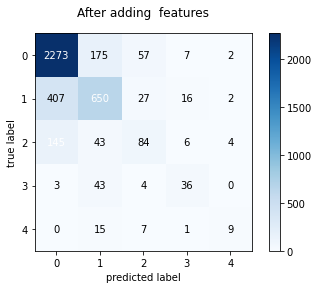

              precision    recall  f1-score   support

           0      0.804     0.904     0.851      2514
           1      0.702     0.590     0.641      1102
           2      0.469     0.298     0.364       282
           3      0.545     0.419     0.474        86
           4      0.529     0.281     0.367        32

    accuracy                          0.760      4016
   macro avg      0.610     0.498     0.539      4016
weighted avg      0.745     0.760     0.747      4016



In [101]:
confusion = confusion_matrix(test_label, lr_model.predict(test_features))
print("Confusion matrix")
#print(confusion)

plot_confusion_matrix(conf_mat=confusion,
                                colorbar=True)
plt.title("After adding  features")
plt.show()
print(classification_report(test_label, lr_model.predict(test_features), digits=3))

In [ ]:
df_train=train_data[['body','sentiment.polarity','author']].copy()
print(type(df_train))

#df_train['len']=df_train['body'].astype(str).apply(lambda x : len(x))
#df_train['len']=pd.to_numeric(df_train['len'])

df_train['body']= df_train['author']  + "  " +  df_train['author'] + " " + df_train['body'] + df_train['author']
print(df_train.shape)
df_train.head(5)


<class 'pandas.core.frame.DataFrame'>
(12138, 3)


,body,sentiment.polarity,author
0,"Melodrama_ Melodrama_ It's a sad realization,...",negative,Melodrama_
1,Melodrama_ Melodrama_ I told her a couple of ...,neutral,Melodrama_
2,TreatYoSelves TreatYoSelves Leeches don't mak...,positive,TreatYoSelves
3,Melodrama_ Melodrama_ I just ended it. Appare...,positive,Melodrama_
4,TreatYoSelves TreatYoSelves Good for you! Ma...,positive,TreatYoSelves


In [ ]:
from scipy import sparse
label=[]
for i in train_data['sentiment.polarity']:
  if i=='neutral':
    label.append(0)
  if i=="positive":
    label.append(1)
  if i=="negative":
    label.append(2)
  if i=="very positive":
    label.append(3)
  if i=="very negative":
    label.append(4)
  
print("Train label",len(label))

mainstring_new=text_preprocessing_new(df_train,'body')
print(len(mainstring_new))
one_hot_vectorizer = TfidfVectorizer(max_features=700,sublinear_tf='bool')
train_features = one_hot_vectorizer.fit_transform(mainstring_new)
print(train_features.shape)



Train label 12138
time taken :   0.3514580726623535
12138
(12138, 700)


In [ ]:
from scipy import sparse
test_label=[]
for i in test_data['sentiment.polarity']:
  if i=='neutral':
    test_label.append(0)
  if i=="positive":
    test_label.append(1)
  if i=="negative":
    test_label.append(2)
  if i=="very positive":
    test_label.append(3)
  if i=="very negative":
    test_label.append(4)
  
print("Test label",len(test_label))

test_mainstring_new=text_preprocessing_new(test_data,'body')
print(len(test_mainstring_new))
test_features = one_hot_vectorizer.transform(test_mainstring_new)
print(test_features.shape)



Test label 4016
time taken :   0.10492968559265137
4016
(4016, 700)


In [ ]:
lr = LogisticRegression(random_state=1,max_iter=1000,C=100,solver='sag')
lr_model = lr.fit(train_features, label)
print(lr_model.score(test_features, test_label))
print(lr_model.score(train_features, label))


0.7338147410358565
0.7917284560883177


In [ ]:
df_train=train_data[['body','sentiment.polarity','sentiment.subjectivity',]].copy()
print(type(df_train))
df_train['len']=df_train['body'].astype(str).apply(lambda x : len(x))
df_train['len']=df_train['len']/np.max(df_train['len'])
df_train.head(5)


<class 'pandas.core.frame.DataFrame'>


,body,sentiment.polarity,sentiment.subjectivity,len
0,"It's a sad realization, isn't it?",negative,1.000000,0.002809
1,I told her a couple of minutes ago that I didn...,neutral,0.483631,0.038563
2,Leeches don't make good friends.,positive,0.600000,0.002809
3,I just ended it. Apparently she wasn't a good ...,positive,0.475000,0.011067
4,Good for you! Make sure you stick with it.,positive,0.744444,0.003746


In [ ]:
from scipy import sparse
label=[]
for i in train_data['sentiment.polarity']:
  if i=='neutral':
    label.append(0)
  if i=="positive":
    label.append(1)
  if i=="negative":
    label.append(2)
  if i=="very positive":
    label.append(3)
  if i=="very negative":
    label.append(4)
  
print("Train label",len(label))

mainstring_new=text_preprocessing_new(train_data,'body')
print(len(mainstring_new))
one_hot_vectorizer = TfidfVectorizer(max_features=700,sublinear_tf='bool',min_df=4)
train_features = one_hot_vectorizer.fit_transform(mainstring_new)
print(train_features.shape)

train=df_train.iloc[:,2:].values
print(train.shape)

train_features=sparse.hstack((train_features,train)).A
print(train_features.shape)

one_hot_vectorizer1 = TfidfVectorizer(max_features=700,sublinear_tf='bool',ngram_range=(1, 2))
train_features_1 = one_hot_vectorizer1.fit_transform(mainstring_new)

print(train_features_1.shape)


train_features=sparse.hstack((train_features,train_features_1)).A
print(train_features.shape)




Train label 12138
time taken :   0.30594944953918457
12138
(12138, 700)
(12138, 2)
(12138, 702)
(12138, 700)
(12138, 1402)


In [ ]:
df_test=test_data[['body','sentiment.polarity','sentiment.subjectivity']].copy()
print(type(df_test))
df_test['len']=df_test['body'].astype(str).apply(lambda x : len(x))
df_test['len']=df_test['len']/np.max(df_test['len'])
df_test.head(5)

<class 'pandas.core.frame.DataFrame'>


,body,sentiment.polarity,sentiment.subjectivity,len
0,Was watching a VOD from last years DreamHack W...,neutral,0.350000,0.050487
1,I find it cool that both Mana and Naama made i...,positive,0.650000,0.025243
2,"Even better, watch a VOD from [MLG Raleigh](ht...",neutral,0.800000,0.052872
3,Wasn't that also an epic and awesome series? I...,very positive,0.566667,0.022461
4,Basically what the title says.,neutral,0.000000,0.005963


In [ ]:
from scipy import sparse
test_label=[]
for i in test_data['sentiment.polarity']:
  if i=='neutral':
    test_label.append(0)
  if i=="positive":
    test_label.append(1)
  if i=="negative":
    test_label.append(2)
  if i=="very positive":
    test_label.append(3)
  if i=="very negative":
    test_label.append(4)
  
print("Test label",len(test_label))

test_mainstring_new=text_preprocessing_new(test_data,'body')
print(len(test_mainstring_new))
test_features = one_hot_vectorizer.transform(test_mainstring_new)
print(test_features.shape)
test_features_1 = one_hot_vectorizer1.transform(test_mainstring_new)

test=df_test.iloc[:,2:].values
print(test.shape,)

test_features=sparse.hstack((test_features,test)).A
print(test_features.shape)

test_features=sparse.hstack((test_features,test_features_1)).A
print(test_features.shape)



Test label 4016
time taken :   0.10496091842651367
4016
(4016, 700)
(4016, 2)
(4016, 702)
(4016, 1402)


0.7552290836653387
0.8322623166913824
